![Alt text](https://daxg39y63pxwu.cloudfront.net/images/blog/churn-models/Customer_Churn_Prediction_Models_in_Machine_Learning.png)


# Importing Libraries

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , accuracy_score,precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder


In [50]:
train=pd.read_csv('churn-bigml-80.csv')
test=pd.read_csv('churn-bigml-20.csv')

# Check Data

In [51]:
train

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [53]:
train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [54]:
train.describe(include='object')

,State,International plan,Voice mail plan
count,2666,2666,2666
unique,51,2,2
top,WV,No,No
freq,88,2396,1933


In [55]:
train.duplicated().sum()

0

# Functions for Explore Data

In [56]:
def cat_columns(df, column_name):
    """
    Analyzes a column in a DataFrame by displaying unique values, 
    count of null values, value counts, and a countplot.
    """
    print(f"{column_name} Column")
    print("=" * 50 + '\n')   
    
    print(f"Unique values in '{column_name}':\n{df[column_name].unique()}\n")
    
    print('-------------------------------------------------------------\n')

    print(f"Value counts in '{column_name}':\n{df[column_name].value_counts()}\n")
    
    print('-------------------------------------------------------------\n')

    print(f"Descriptive statistics for '{column_name}':\n{df[column_name].describe(include='object')}\n")
    
    print('-------------------------------------------------------------\n')

    print('-------------------------------------------------------------\n')
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=column_name,order=df[column_name].value_counts()[:10].index,color='#4B164C')
    plt.title(f"Countplot for '{column_name}'", fontsize=16)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel(column_name, fontsize=12)
    plt.show()
    
    print('_______________________________________________________________________________________________________\n')

In [57]:
def num_columns(df, column_name):
    """
    Analyzes a column in a DataFrame by displaying unique values, 
    count of null values, value counts, and a countplot.
    """
    print(f"{column_name} Column")
    print("=" * 50 + '\n')   

    print(f"Unique values in '{column_name}':\n{df[column_name].unique()}\n")
    
    print('-------------------------------------------------------------\n')

    print(f"Value counts in '{column_name}':\n{df[column_name].value_counts()}\n")
    
    print('-------------------------------------------------------------\n')

    print(f"Descriptive statistics for '{column_name}':\n{df[column_name].describe()}\n")
    
    print('-------------------------------------------------------------\n')

    print(f"Null values in '{column_name}': {df[column_name].isnull().sum()}\n")
    
    print('-------------------------------------------------------------\n')
    
    plt.figure(figsize=(10, 6))
    plt.hist(df[column_name].dropna(), edgecolor='black',color="#4B164C")
    plt.title(f"Histogram for '{column_name}'", fontsize=16)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    print('_______________________________________________________________________________________________________\n')


# Exploring Data

State Column

Unique values in 'State':
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'WV' 'RI' 'IA' 'MT' 'ID' 'VT' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'NE' 'WY' 'IL' 'NH' 'LA' 'GA' 'AK' 'MD' 'AR' 'WI'
 'OR' 'DE' 'IN' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'NY' 'KY'
 'ME' 'MS' 'MI' 'SC' 'TN' 'PA' 'HI' 'ND' 'CT']

-------------------------------------------------------------

Value counts in 'State':
WV    88
MN    70
NY    68
VA    67
AL    66
OH    66
WY    66
OR    62
NV    61
WI    61
MD    60
UT    60
CO    59
CT    59
MI    58
VT    57
ID    56
NC    56
TX    55
FL    54
IN    54
MT    53
OK    52
MA    52
KS    52
MO    51
DE    51
NJ    50
SC    49
SD    49
ME    49
GA    49
RI    48
MS    48
WA    48
AR    47
IL    45
DC    45
AZ    45
NE    45
HI    44
NM    44
ND    44
AK    43
KY    43
NH    43
TN    41
IA    38
PA    36
LA    35
CA    24
Name: State, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'State':
count     2666
unique     

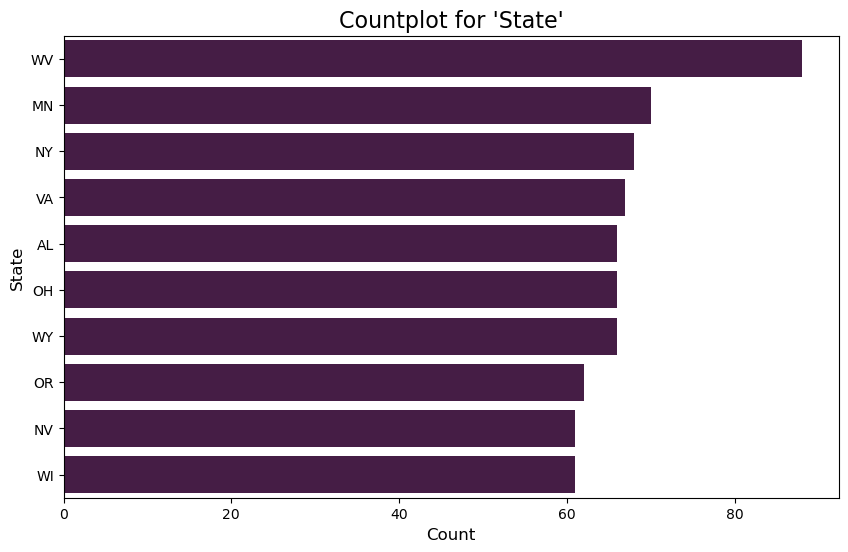

_______________________________________________________________________________________________________

Account length Column

Unique values in 'Account length':
[128 107 137  84  75 118 121 147 141  74 168  95  62  85  93  76  73  77
 130 132 174  57  54  20 142 172  12  72  78 136 149  98 135  34 160  64
  59  97  52  60  96  87  81 125 116  38  40  43 113 126 150 138 162  90
  50  82 144  70  55 106  94 111  80 104  99 120 122 157 103  36 112  46
  41 193  61  92 131 163  91 127 110 117 140  83 145  56 151 139 115 146
 185 148  68 179  67  19 170 164  51  63  53 105  66  86  35  88 123 100
 108  22  33 114  24 119 101  49  48  71 167 166 158 196 209  16  39 173
 129 143  89  44  79  31  37 159 194 154  45  32  21 133  25 224  58 155
  11 109 165  18 161 124  30 176  47 190 152  65 186 171 102  28 153 169
  13  42 189  69  27 134 156 243  23 205 200   5   9 178 181 182 177 210
 180   3  10   2  17 212   1  29 192 195   6 225 184 197  15 183 202   8
 217   4 188   7 204 201 221]

---

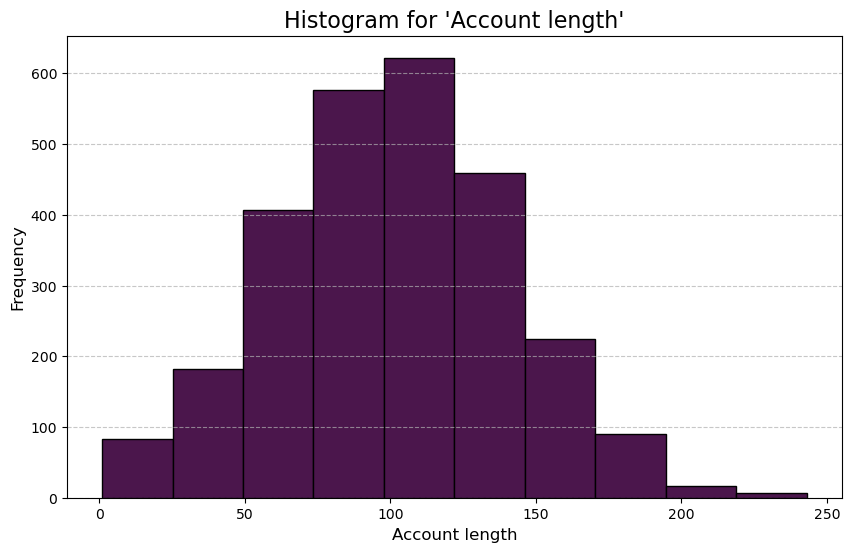

_______________________________________________________________________________________________________

Area code Column

Unique values in 'Area code':
[415 408 510]

-------------------------------------------------------------

Value counts in 'Area code':
415    1318
510     679
408     669
Name: Area code, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'Area code':
count    2666.000000
mean      437.438860
std        42.521018
min       408.000000
25%       408.000000
50%       415.000000
75%       510.000000
max       510.000000
Name: Area code, dtype: float64

-------------------------------------------------------------

Null values in 'Area code': 0

-------------------------------------------------------------



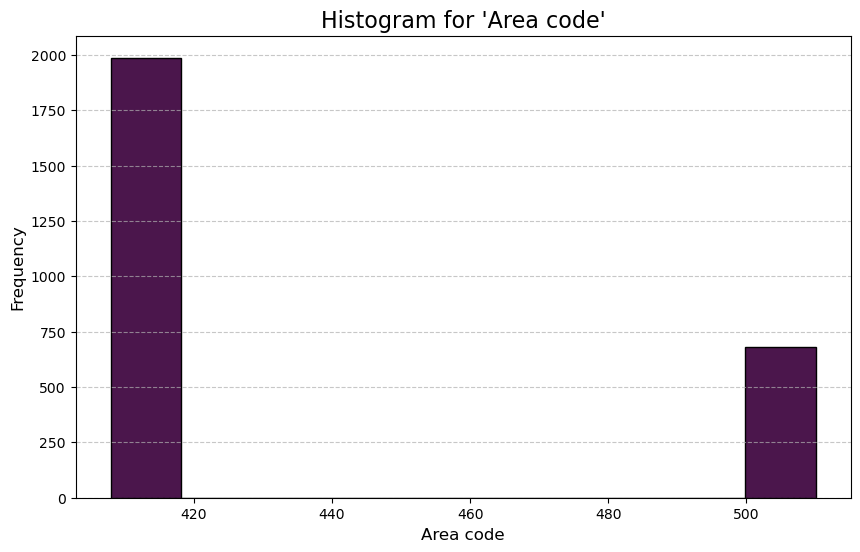

_______________________________________________________________________________________________________

International plan Column

Unique values in 'International plan':
['No' 'Yes']

-------------------------------------------------------------

Value counts in 'International plan':
No     2396
Yes     270
Name: International plan, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'International plan':
count     2666
unique       2
top         No
freq      2396
Name: International plan, dtype: object

-------------------------------------------------------------

-------------------------------------------------------------



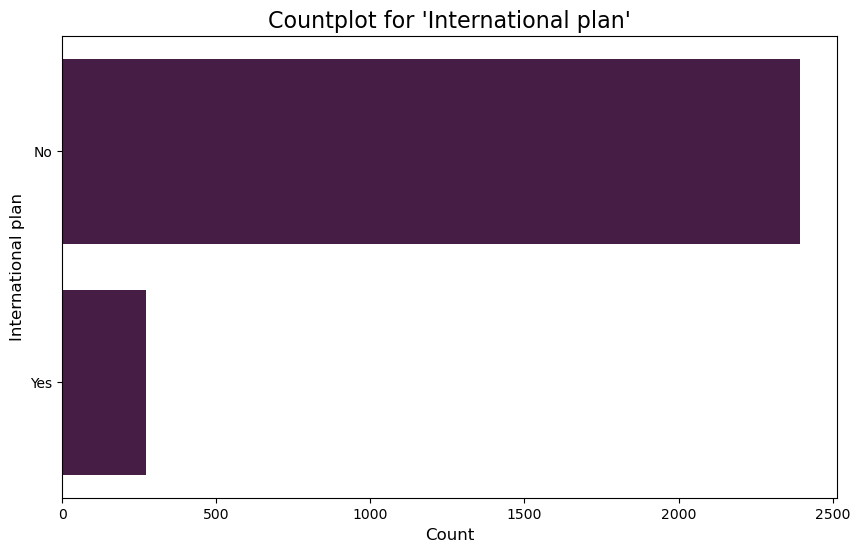

_______________________________________________________________________________________________________

Voice mail plan Column

Unique values in 'Voice mail plan':
['Yes' 'No']

-------------------------------------------------------------

Value counts in 'Voice mail plan':
No     1933
Yes     733
Name: Voice mail plan, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'Voice mail plan':
count     2666
unique       2
top         No
freq      1933
Name: Voice mail plan, dtype: object

-------------------------------------------------------------

-------------------------------------------------------------



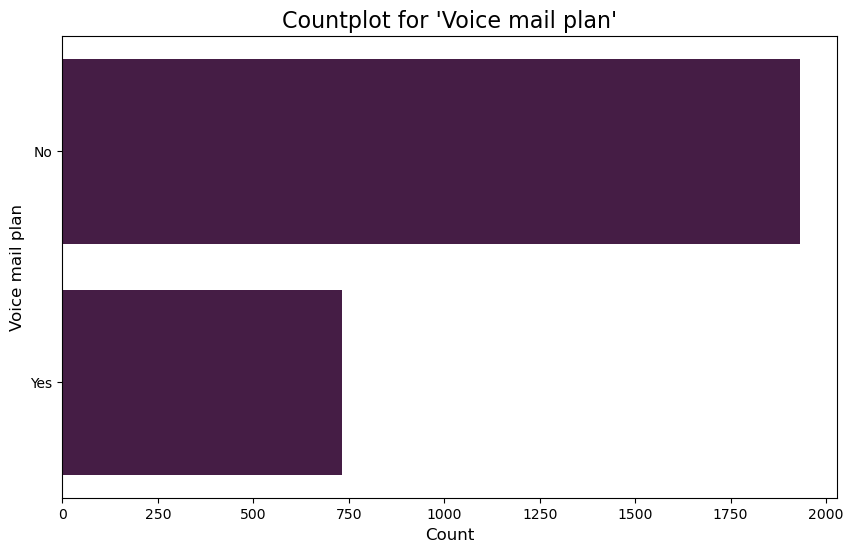

_______________________________________________________________________________________________________

Number vmail messages Column

Unique values in 'Number vmail messages':
[25 26  0 24 37 27 33 39 41 28 30 34 46 35 21 42 36 22 23 43 31 38 40 29
 18 32 17 45 16 14 20 19 15 12 47  8 44  4 10 13 50  9]

-------------------------------------------------------------

Value counts in 'Number vmail messages':
0     1933
31      50
28      42
29      39
24      37
33      37
30      35
27      34
25      33
32      33
26      32
23      30
37      25
22      24
35      24
34      23
36      23
38      22
39      22
21      22
20      14
19      14
42      13
40      13
17      12
16      11
43       9
15       8
44       7
41       7
18       6
12       6
14       5
45       4
46       3
47       3
13       3
8        2
50       2
9        2
4        1
10       1
Name: Number vmail messages, dtype: int64

-------------------------------------------------------------

Descriptive statistic

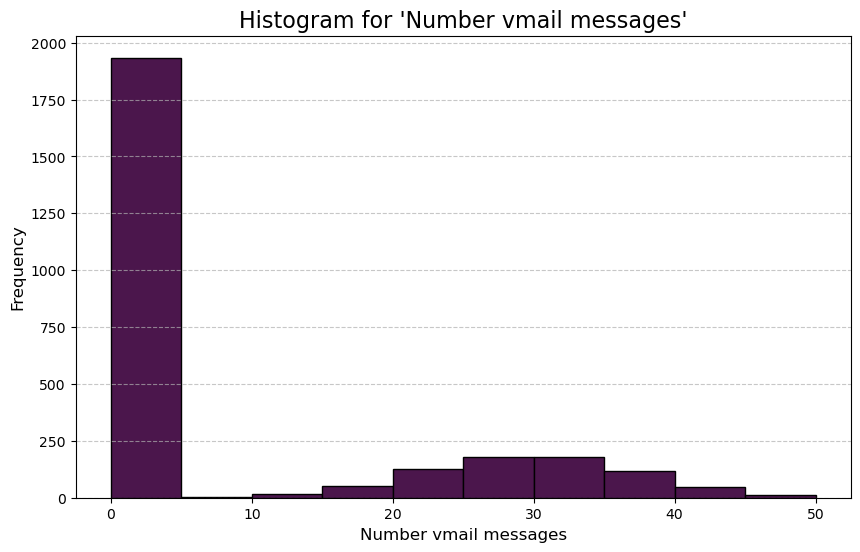

_______________________________________________________________________________________________________

Total day minutes Column

Unique values in 'Total day minutes':
[265.1 161.6 243.4 ... 106.6 231.1 180.8]

-------------------------------------------------------------

Value counts in 'Total day minutes':
162.3    7
183.4    7
216.0    6
175.4    6
159.5    6
        ..
209.6    1
247.0    1
321.3    1
150.9    1
180.8    1
Name: Total day minutes, Length: 1489, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'Total day minutes':
count    2666.00000
mean      179.48162
std        54.21035
min         0.00000
25%       143.40000
50%       179.95000
75%       215.90000
max       350.80000
Name: Total day minutes, dtype: float64

-------------------------------------------------------------

Null values in 'Total day minutes': 0

-------------------------------------------------------------



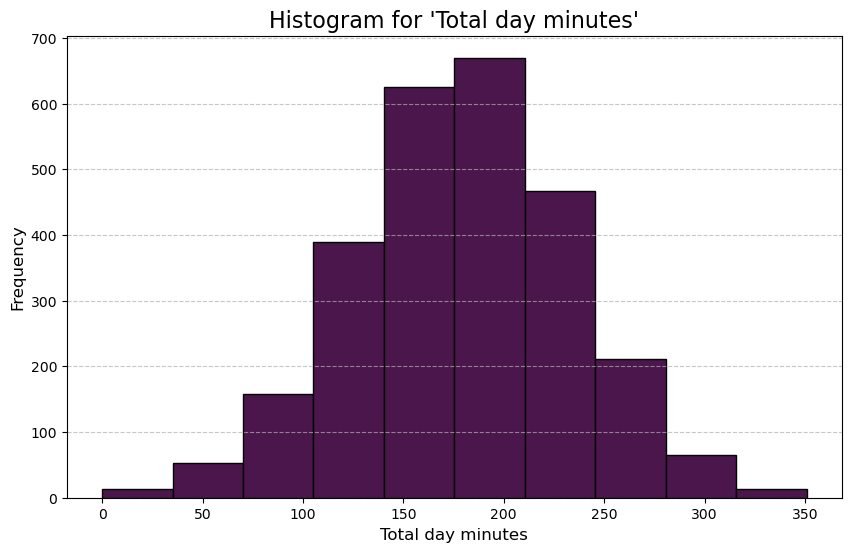

_______________________________________________________________________________________________________

Total day calls Column

Unique values in 'Total day calls':
[110 123 114  71 113  98  88  79  84 127  96  70 139  66  90 117  89 112
  86  76 115  73 109  95 105 121 118  94  80  64 106 102  85  82  77  67
  97 133 135 108  57  83 129 103  92  74  93 101 146  99 104 125  61 100
  87 131  65 124 119  52  68 107  47 116 120 151 126  91 122 111 145  78
 136 140  81 128  69 158 134 130  63  53  75 141  59 132 138 137  54  58
  62  36  72  40 150 147  56  51  55 148  48  60  42   0  45 160 149 144
 143 152 142 156  49 157  44]

-------------------------------------------------------------

Value counts in 'Total day calls':
105    62
106    59
108    59
112    58
102    57
       ..
152     1
40      1
156     1
157     1
149     1
Name: Total day calls, Length: 115, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'Total day calls':

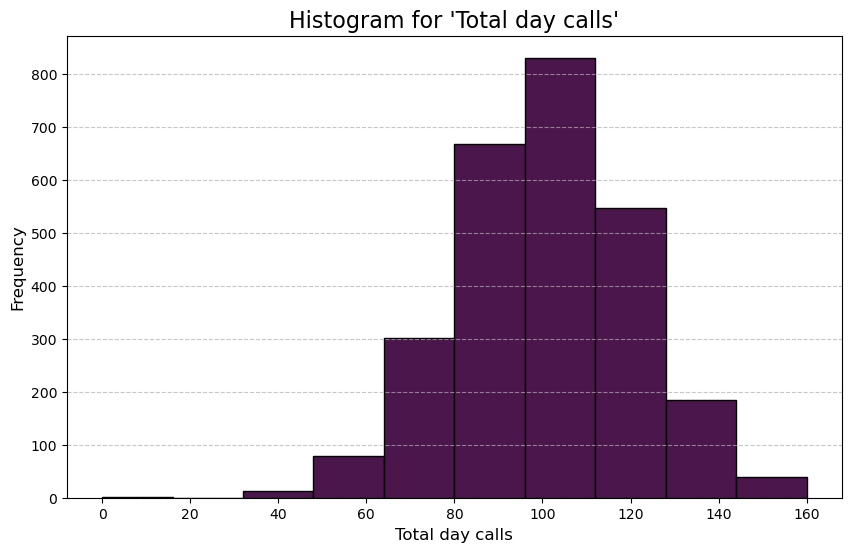

_______________________________________________________________________________________________________

Total day charge Column

Unique values in 'Total day charge':
[45.07 27.47 41.38 ... 18.12 39.29 30.74]

-------------------------------------------------------------

Value counts in 'Total day charge':
27.59    7
31.18    7
36.72    6
29.82    6
27.12    6
        ..
35.63    1
41.99    1
54.62    1
25.65    1
30.74    1
Name: Total day charge, Length: 1489, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'Total day charge':
count    2666.000000
mean       30.512404
std         9.215733
min         0.000000
25%        24.380000
50%        30.590000
75%        36.700000
max        59.640000
Name: Total day charge, dtype: float64

-------------------------------------------------------------

Null values in 'Total day charge': 0

-------------------------------------------------------------



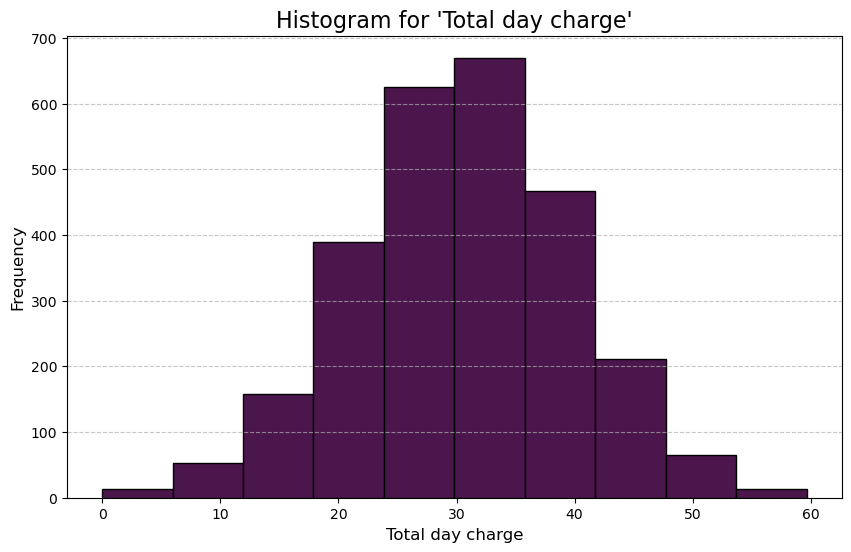

_______________________________________________________________________________________________________

Total eve minutes Column

Unique values in 'Total eve minutes':
[197.4 195.5 121.2 ... 153.4 288.8 265.9]

-------------------------------------------------------------

Value counts in 'Total eve minutes':
169.9    8
220.6    7
167.2    7
161.7    7
224.9    6
        ..
125.8    1
277.9    1
269.5    1
124.2    1
265.9    1
Name: Total eve minutes, Length: 1442, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'Total eve minutes':
count    2666.000000
mean      200.386159
std        50.951515
min         0.000000
25%       165.300000
50%       200.900000
75%       235.100000
max       363.700000
Name: Total eve minutes, dtype: float64

-------------------------------------------------------------

Null values in 'Total eve minutes': 0

-------------------------------------------------------------



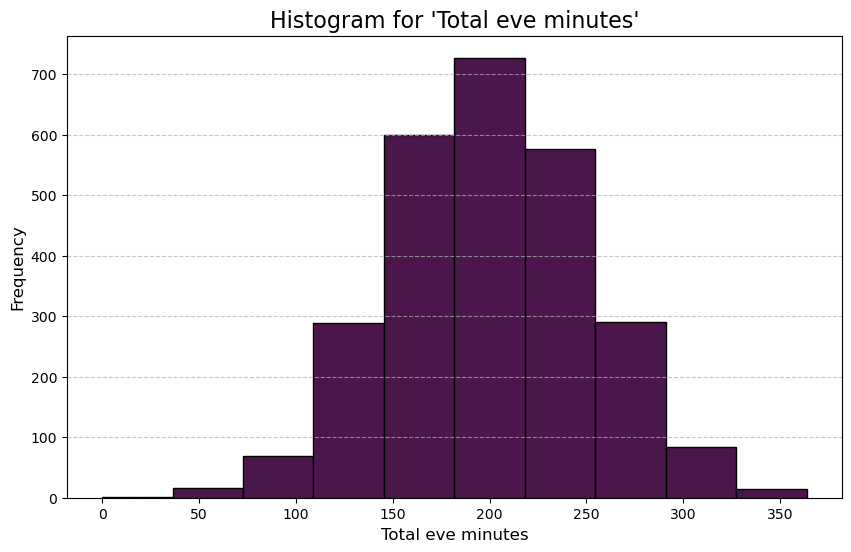

_______________________________________________________________________________________________________

Total eve calls Column

Unique values in 'Total eve calls':
[ 99 103 110  88 122 101 108  94 111 148  71  75  76  90  65  93 121  72
 112 100  84  63 107 115 119 102 116  92  85  98 118  74  58  96  67  62
  77 126 142  64  97 104  80  83 117  79  95 105  81 113 109  48  82  86
  87 123 114 140 128 106  60 125  46 138 129  89 133 136  57 135 139  51
  70  78 151  91 152 120  66 127 132 137  73 143  68  61  42  54 149 124
 134 131  69 130  52  49  59 146 147  55  12  50 157  56  45 144  36 156
  53 141  44 153 154 155 150  43   0 145 159 170]

-------------------------------------------------------------

Value counts in 'Total eve calls':
105    64
94     62
109    58
102    56
108    55
       ..
49      1
157     1
12      1
151     1
170     1
Name: Total eve calls, Length: 120, dtype: int64

-------------------------------------------------------------

Descriptive statistics fo

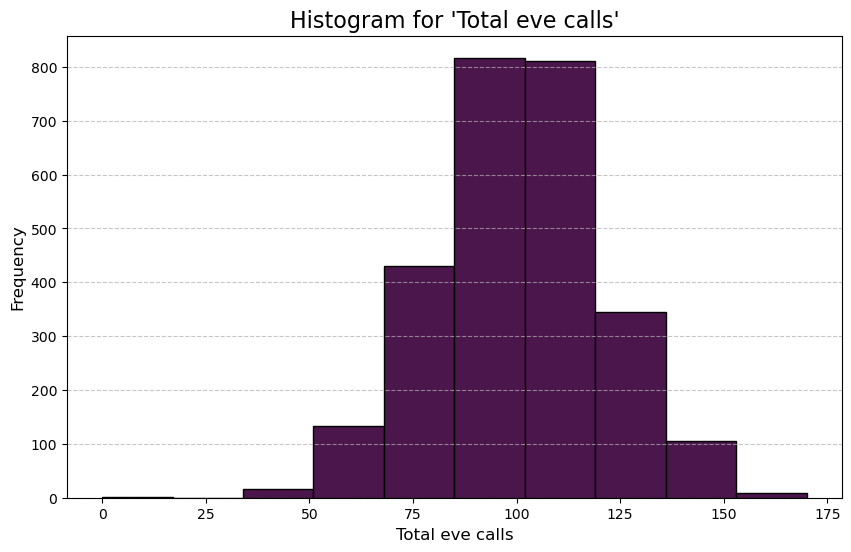

_______________________________________________________________________________________________________

Total eve charge Column

Unique values in 'Total eve charge':
[16.78 16.62 10.3  ... 13.04 24.55 22.6 ]

-------------------------------------------------------------

Value counts in 'Total eve charge':
16.12    9
14.25    9
18.62    8
17.99    8
18.96    8
        ..
7.67     1
6.89     1
18.93    1
5.70     1
22.60    1
Name: Total eve charge, Length: 1301, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'Total eve charge':
count    2666.000000
mean       17.033072
std         4.330864
min         0.000000
25%        14.050000
50%        17.080000
75%        19.980000
max        30.910000
Name: Total eve charge, dtype: float64

-------------------------------------------------------------

Null values in 'Total eve charge': 0

-------------------------------------------------------------



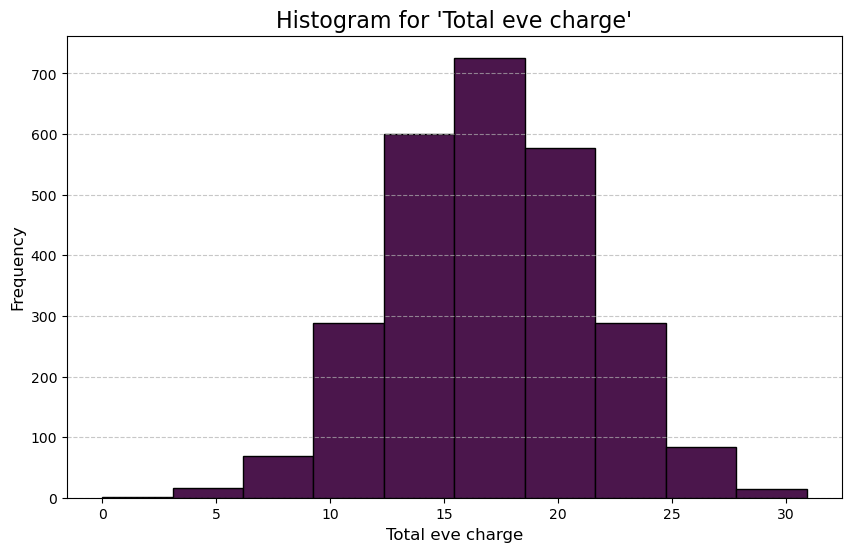

_______________________________________________________________________________________________________

Total night minutes Column

Unique values in 'Total night minutes':
[244.7 254.4 162.6 ... 221.4 279.1 191.3]

-------------------------------------------------------------

Value counts in 'Total night minutes':
214.7    7
181.2    6
172.7    6
210.0    6
214.0    6
        ..
63.6     1
111.6    1
381.9    1
186.1    1
191.3    1
Name: Total night minutes, Length: 1444, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'Total night minutes':
count    2666.000000
mean      201.168942
std        50.780323
min        43.700000
25%       166.925000
50%       201.150000
75%       236.475000
max       395.000000
Name: Total night minutes, dtype: float64

-------------------------------------------------------------

Null values in 'Total night minutes': 0

-------------------------------------------------------------



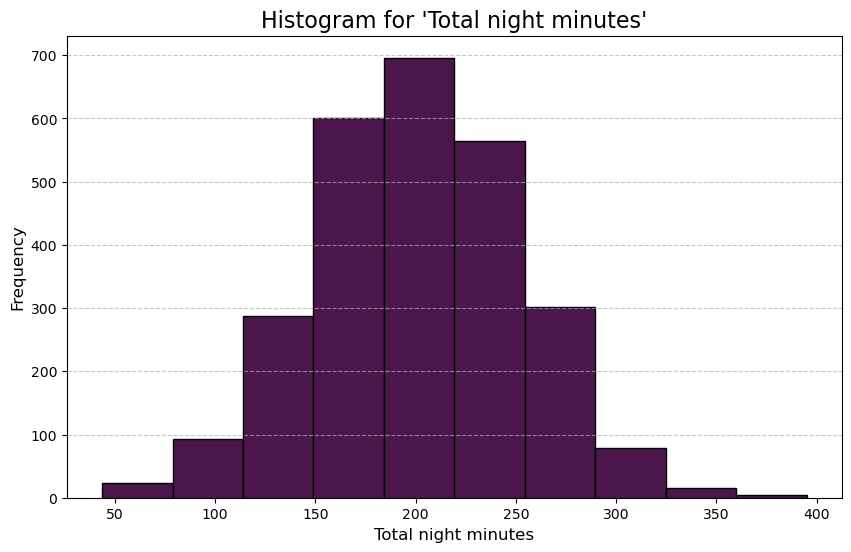

_______________________________________________________________________________________________________

Total night calls Column

Unique values in 'Total night calls':
[ 91 103 104  89 121 118  96  97  94 128 115  99  75 108  74 133  64  78
  68 102 148  98  90 116  71 107 135  92  86 127  79  87 129  77  95  54
 106  53  67 139  60 100  61 109 105 111  73  76 119  88  84  57  62 137
 113 114 126 122 123 117  82 120  80 130 134  59 112 132 142 101  69 131
 110  83  93 124 136  81  66 143  55  56  70  85  46 152  44 145  58  50
  42 153 125  49 138  72 154 140 141 146  63  65  51 151 158 157 147 144
 149 166  33 155 156  38  36 150  48 164]

-------------------------------------------------------------

Value counts in 'Total night calls':
105    70
104    67
91     60
106    58
102    58
       ..
38      1
36      1
150     1
48      1
164     1
Name: Total night calls, Length: 118, dtype: int64

-------------------------------------------------------------

Descriptive statistics fo

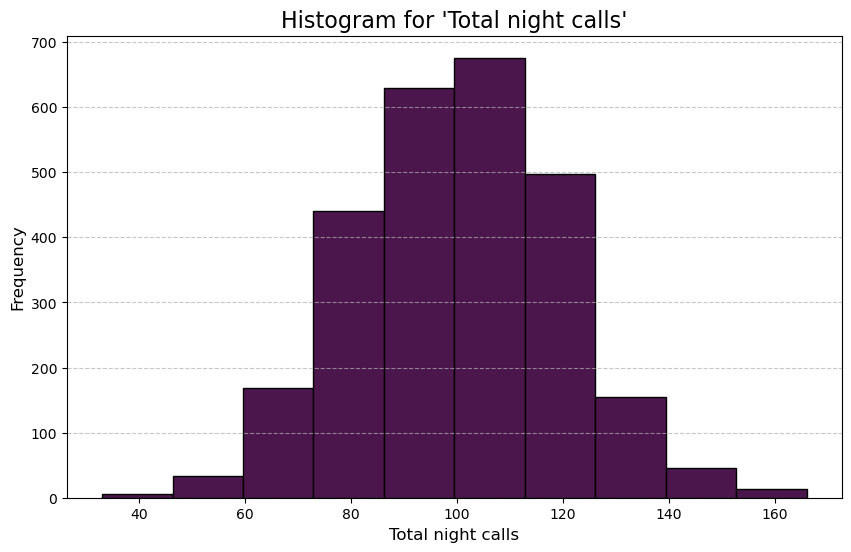

_______________________________________________________________________________________________________

Total night charge Column

Unique values in 'Total night charge':
[11.01 11.45  7.32  8.86  8.41  9.18  9.57  9.53 14.69  8.82  6.35  8.65
  9.14  4.02  5.83  7.46  8.68  9.4   9.43  8.18 10.67 11.28  8.22  4.59
  8.17 11.27 11.08 13.2  12.61  9.61  6.88 10.25  4.58  8.47  8.45  5.5
 14.02  8.03 11.94  7.34 10.9   3.18 10.66 11.21 10.28 12.16  6.34  8.15
  8.52  7.5   7.48 11.95  7.15  9.63  7.1   5.82  6.91  6.69 13.29 11.46
  7.76  6.86  8.16 12.15  7.79 10.29 10.08 12.53  7.91 10.02  8.61  8.53
  8.21  9.09  4.93 11.39 11.88  5.75  8.59  7.52  7.21  8.1  11.19  8.55
  9.76 10.86  5.36 10.03 11.15  6.22  2.59  7.65  7.99  9.    6.4   9.94
  5.08 10.23 11.36  6.97 10.16  7.88 11.91  6.61 11.76  9.27  9.29 11.12
 10.69  8.8  11.85  7.14  8.71 11.42  4.94  9.02 11.22  4.97  5.45 12.91
  7.75  6.32 12.13 11.97  6.93 11.66  7.42  6.19 11.41 10.33 10.65 11.92
  4.77  4.38  7.69  8.78  9

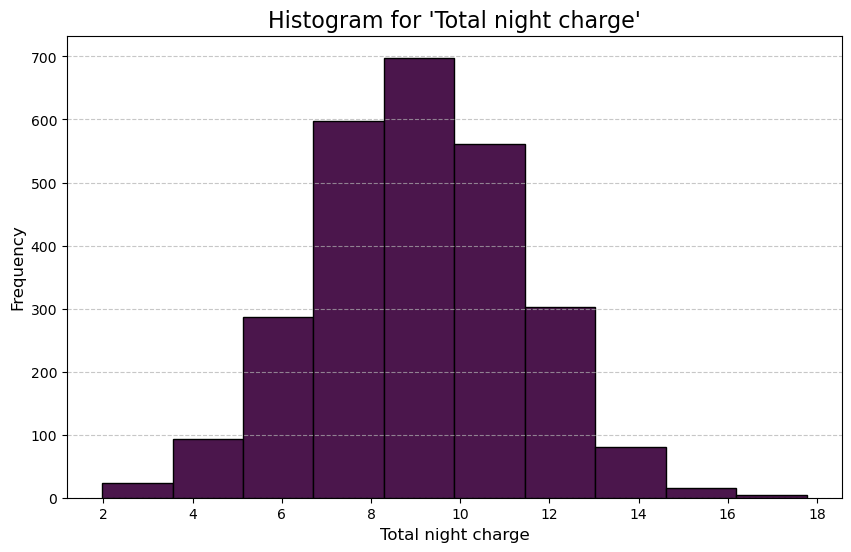

_______________________________________________________________________________________________________

Total intl minutes Column

Unique values in 'Total intl minutes':
[10.  13.7 12.2  6.6 10.1  6.3  7.5  7.1 11.2  9.1 12.3 13.1 13.8  8.1
 13.  10.6  5.7  9.5 10.3 15.5 14.7 14.2 12.6 11.8  8.3 10.5 11.1  9.4
 14.6  9.2  3.5  8.5  7.4 11.   7.8  6.8  9.3  9.7 10.2  8.   5.8 12.
 11.4 11.6  8.2  6.2 12.1  7.3  6.1 11.7 15.  13.2  9.8 12.4 10.9 13.9
  7.9  8.7  5.3  4.4 11.3  9.6 13.3 20.   7.2  6.4 14.1 14.3  6.9 11.5
 15.8 12.8 16.2  0.  11.9  9.9  8.4 10.8  9.   8.9  8.8 13.4 10.7 17.6
  4.7  7.7 13.5 12.9 14.4 14.5  6.7 15.4  5.9 18.9  7.6  5.  12.5  8.6
  7.  14.  12.7 18.  16.  14.8  3.7  4.8 15.3  6.  13.6 17.2 17.5  5.4
 18.2  3.6 16.5  4.6  5.1  4.1  6.5 15.6 10.4 16.4 16.7  1.3 15.2 15.1
 15.9  5.5 16.1 14.9  4.  16.9  5.2  4.2 17.   3.9  2.2  5.6 15.7  4.5
 17.9 16.3  4.9 17.3  3.8 18.4 17.8  4.3  2.9  3.1  3.3  2.6  3.4  1.1
 16.6  2.1  2.4  2.5]

--------------------------

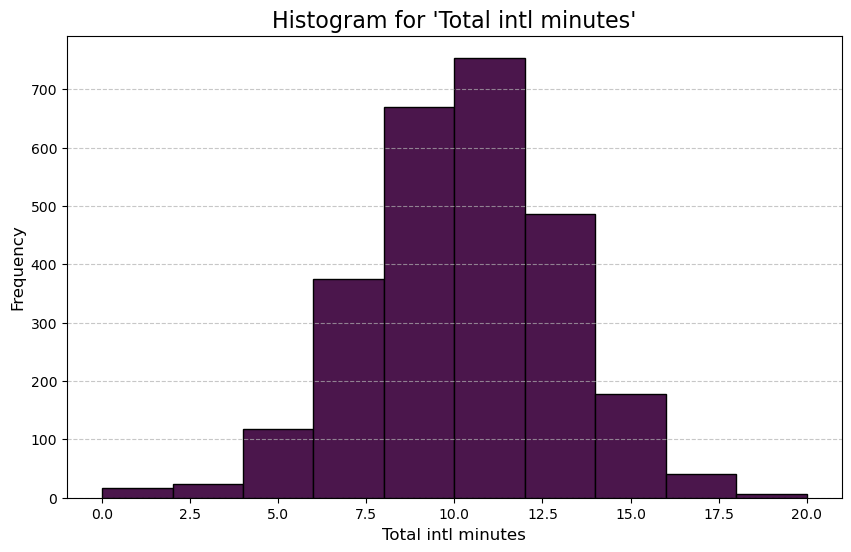

_______________________________________________________________________________________________________

Total intl calls Column

Unique values in 'Total intl calls':
[ 3  5  7  6  2  4 19 10  9 15  8  1 11  0 12 13 18 14 16 20 17]

-------------------------------------------------------------

Value counts in 'Total intl calls':
3     544
4     503
2     388
5     376
6     267
7     172
1     125
8      90
9      83
10     37
11     25
0      15
13     13
12     12
14      5
15      4
18      2
16      2
19      1
20      1
17      1
Name: Total intl calls, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'Total intl calls':
count    2666.000000
mean        4.467367
std         2.456195
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: Total intl calls, dtype: float64

-------------------------------------------------------------

Null values in 'Total intl calls': 0

-

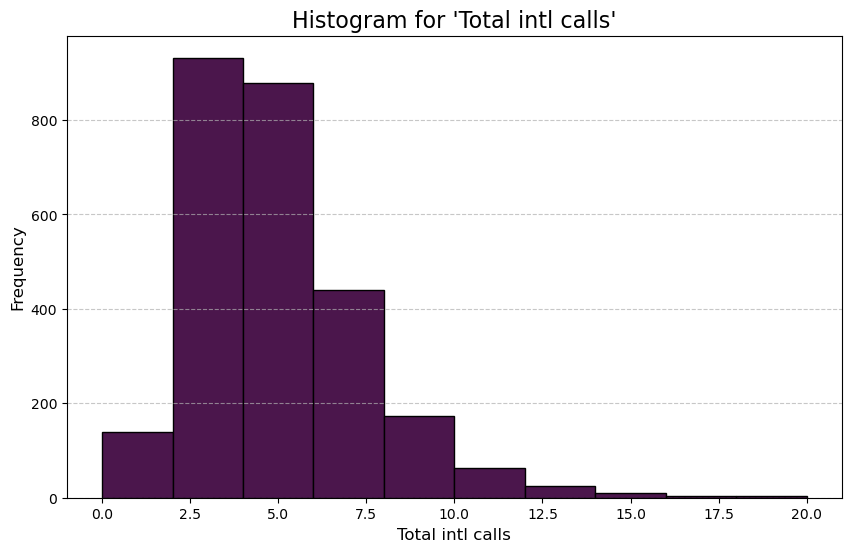

_______________________________________________________________________________________________________

Total intl charge Column

Unique values in 'Total intl charge':
[2.7  3.7  3.29 1.78 2.73 1.7  2.03 1.92 3.02 2.46 3.32 3.54 3.73 2.19
 3.51 2.86 1.54 2.57 2.78 4.19 3.97 3.83 3.4  3.19 2.24 2.84 3.   2.54
 3.94 2.48 0.95 2.3  2.   2.97 2.11 1.84 2.51 2.62 2.75 2.16 1.57 3.24
 3.08 3.13 2.21 1.67 3.27 1.97 1.65 3.16 4.05 3.56 2.65 3.35 2.94 3.75
 2.13 2.35 1.43 1.19 3.05 2.59 3.59 5.4  1.94 1.73 3.81 3.86 1.86 3.11
 4.27 3.46 4.37 0.   3.21 2.67 2.27 2.92 2.43 2.4  2.38 3.62 2.89 4.75
 1.27 2.08 3.65 3.48 3.89 3.92 1.81 4.16 1.59 5.1  2.05 1.35 3.38 2.32
 1.89 3.78 3.43 4.86 4.32 4.   1.   1.3  4.13 1.62 3.67 4.64 4.73 1.46
 4.91 0.97 4.46 1.24 1.38 1.11 1.76 4.21 2.81 4.43 4.51 0.35 4.1  4.08
 4.29 1.49 4.35 4.02 1.08 4.56 1.4  1.13 4.59 1.05 0.59 1.51 4.24 1.22
 4.83 4.4  1.32 4.67 1.03 4.97 4.81 1.16 0.78 0.84 0.89 0.7  0.92 0.3
 4.48 0.57 0.65 0.68]

----------------------------

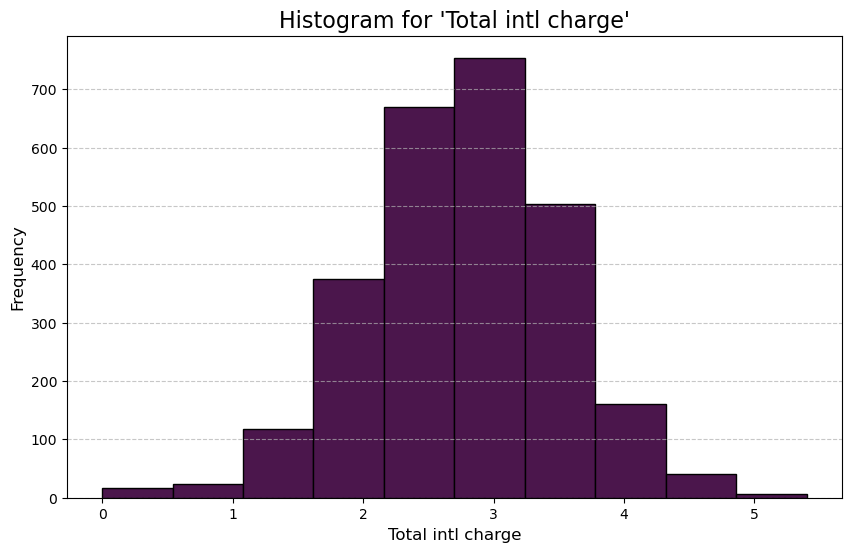

_______________________________________________________________________________________________________

Customer service calls Column

Unique values in 'Customer service calls':
[1 0 2 3 4 5 7 9 6 8]

-------------------------------------------------------------

Value counts in 'Customer service calls':
1    945
2    608
0    555
3    348
4    133
5     49
6     17
7      8
9      2
8      1
Name: Customer service calls, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'Customer service calls':
count    2666.000000
mean        1.562641
std         1.311236
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: Customer service calls, dtype: float64

-------------------------------------------------------------

Null values in 'Customer service calls': 0

-------------------------------------------------------------



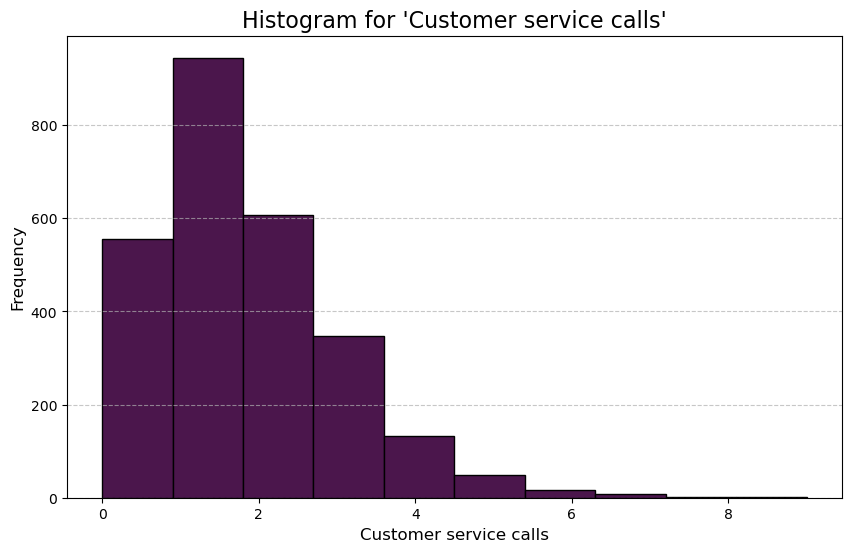

_______________________________________________________________________________________________________

Churn Column

Unique values in 'Churn':
[False  True]

-------------------------------------------------------------

Value counts in 'Churn':
False    2278
True      388
Name: Churn, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'Churn':
count      2666
unique        2
top       False
freq       2278
Name: Churn, dtype: object

-------------------------------------------------------------

-------------------------------------------------------------



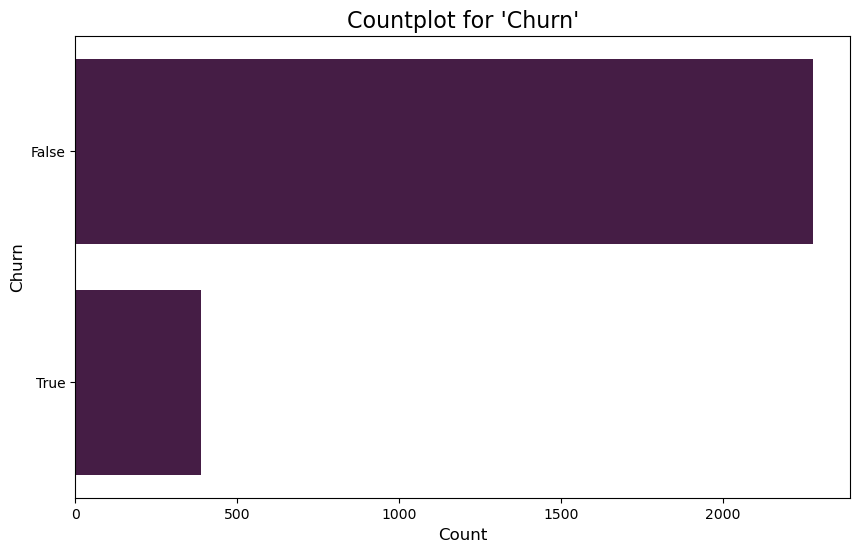

_______________________________________________________________________________________________________



In [58]:
for col in train.columns:
    if train[col].dtype != 'object' and train[col].dtype != 'bool' : 
        num_columns(train, col)
    else:
        cat_columns(train, col)

In [59]:
# Check if the sum of night and evening minutes equals or is less than the total minutes of the day
train_copy=train.copy()
train_copy['total_minutes_check'] = train_copy['Total day minutes'] + train_copy['Total eve minutes'] +train_copy['Total night minutes']

# Optionally, print out any mismatches
train_copy[train_copy['total_minutes_check'] == train_copy['Total day minutes']]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_minutes_check


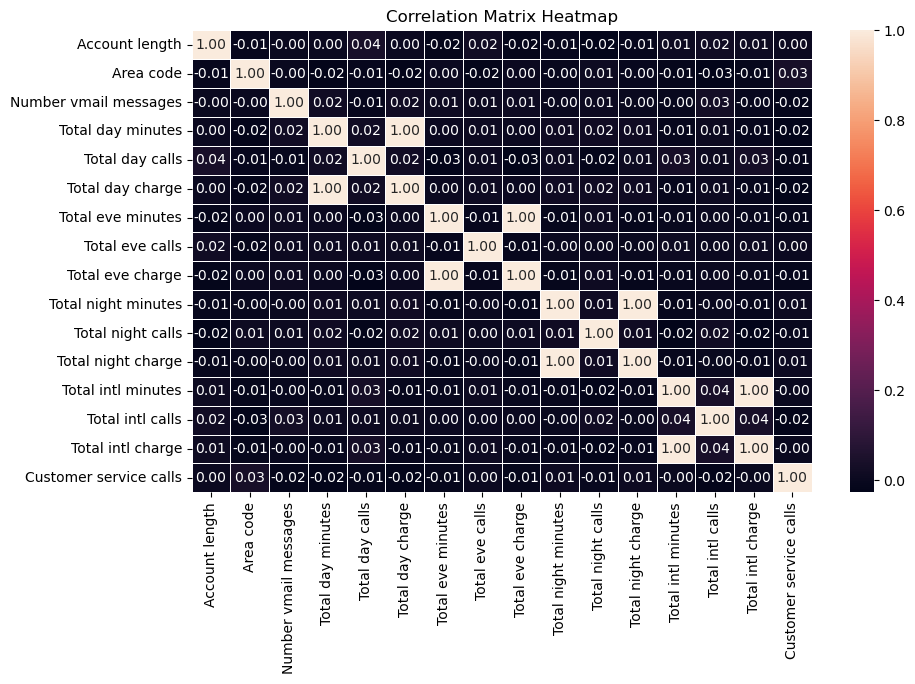

In [60]:
numerical_df = train.select_dtypes(include='number')
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

●There is a prefect relation between all charge columns and all minutes columns so i may remove  charge columns.

●There is no relation between rest columns.

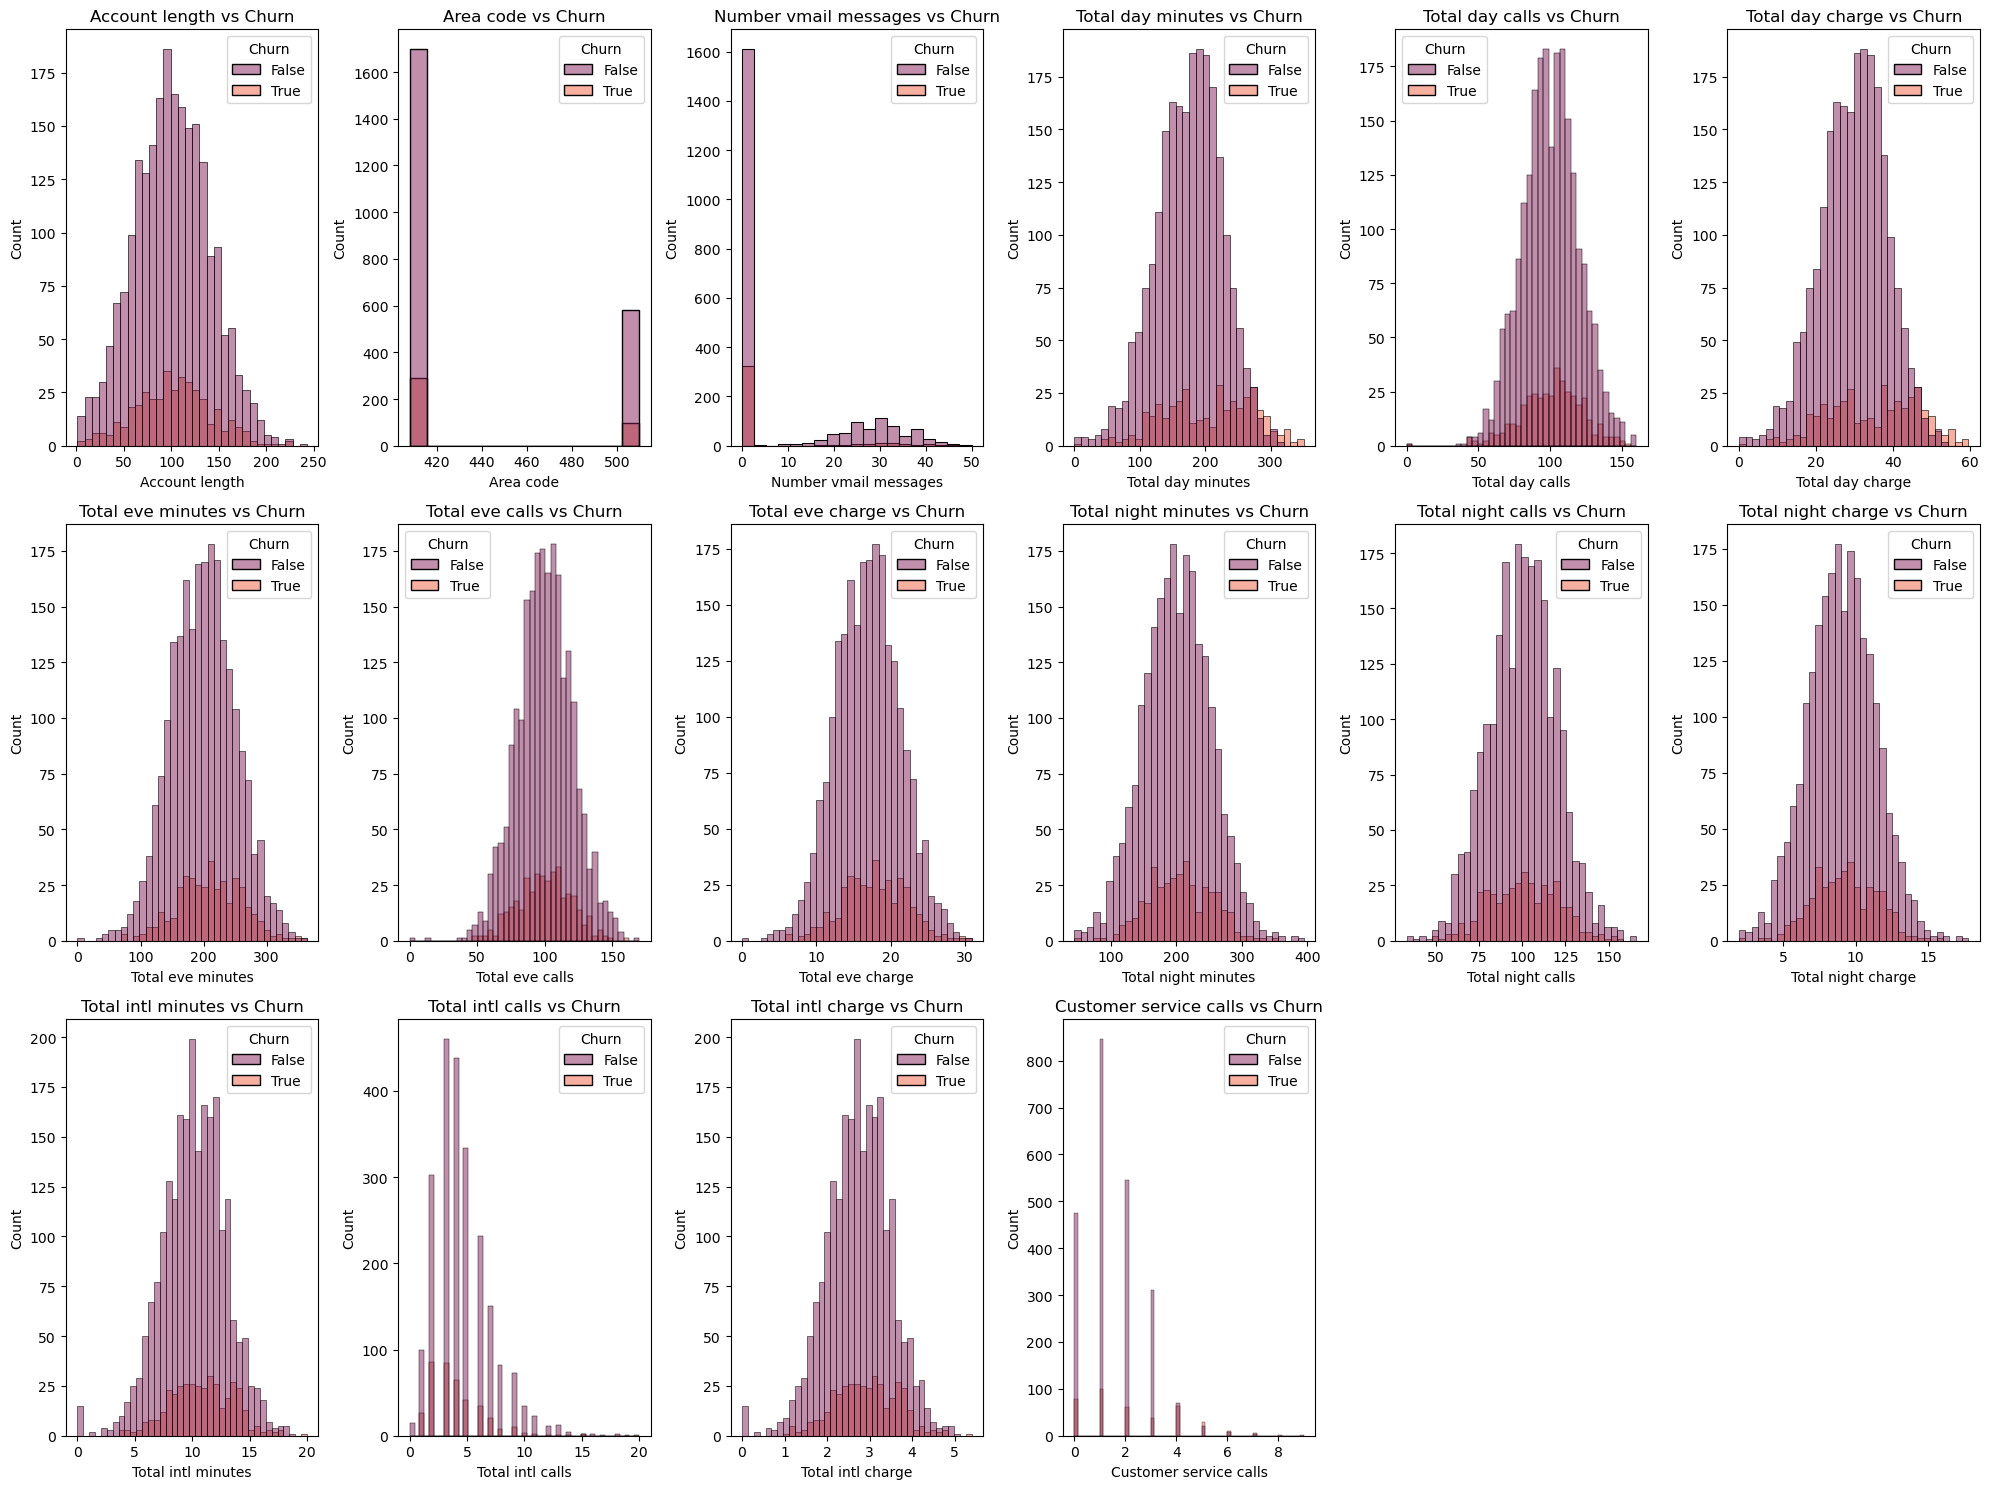

In [61]:
# Filter the numerical columns (excluding 'Churn')
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Remove 'Churn' from the list of numerical columns
numerical_columns = [col for col in numerical_columns if col != 'Churn']

# Calculate the number of rows and columns needed for subplots
num_plots = len(numerical_columns)
ncols = 6  # Keep the number of columns fixed at 6
nrows = (num_plots // ncols) + (1 if num_plots % ncols != 0 else 0)  # Adjust the number of rows

fig, axs = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows))

axs = axs.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(hue='Churn', x=col, data=train, ax=axs[i],palette='rocket') 
    axs[i].set_title(f'{col} vs Churn')  

for j in range(num_plots, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


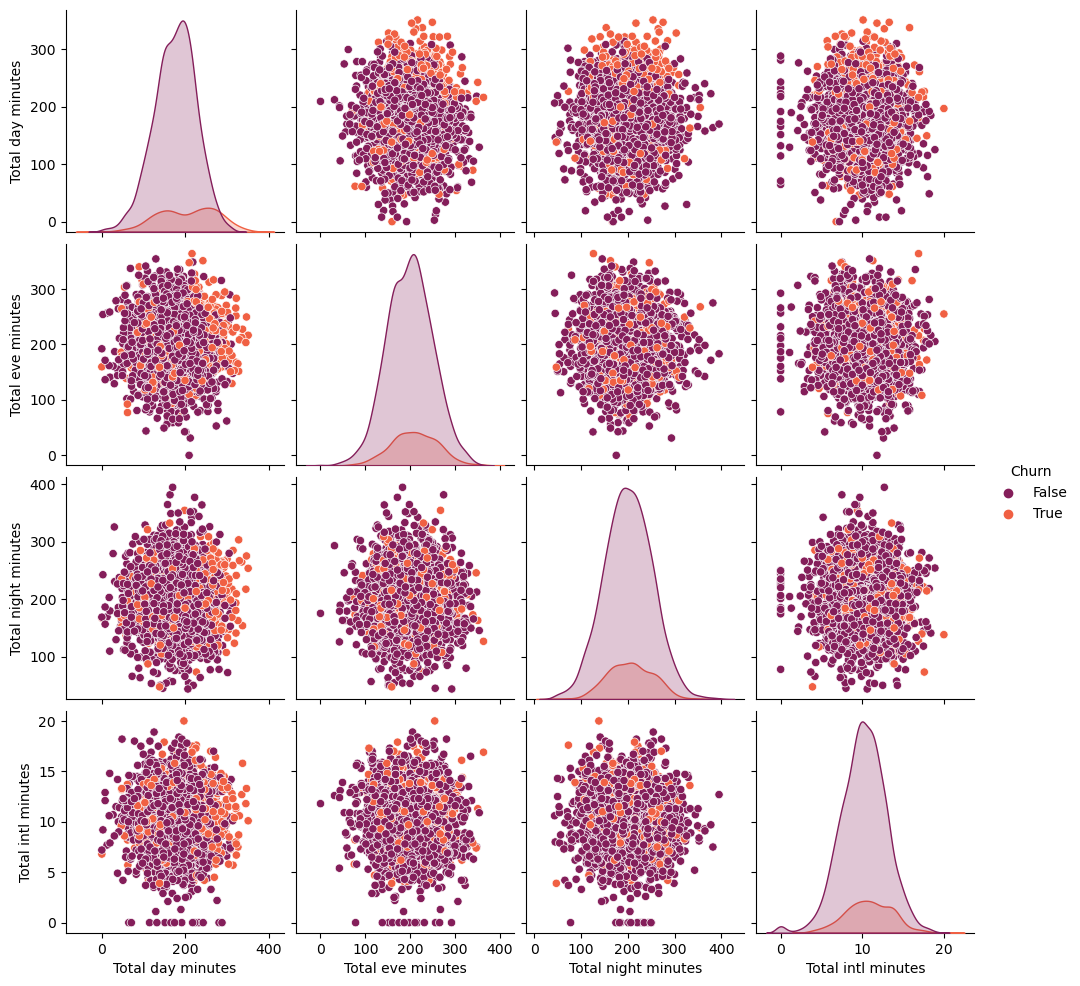

In [62]:
# Select a subset of numerical features
numerical_features = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']

# Create pair plot
sns.pairplot(train[numerical_features + ['Churn']], hue='Churn', palette='rocket', diag_kind='kde')
plt.show()

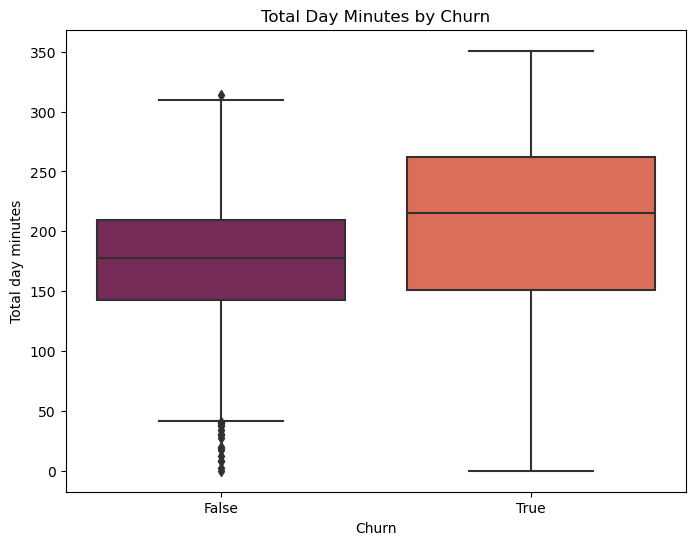

In [63]:
# Example for Total day minutes
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total day minutes', data=train,palette='rocket')
plt.title('Total Day Minutes by Churn')
plt.show()

●The total day minutes are higher for people with a high churn rate

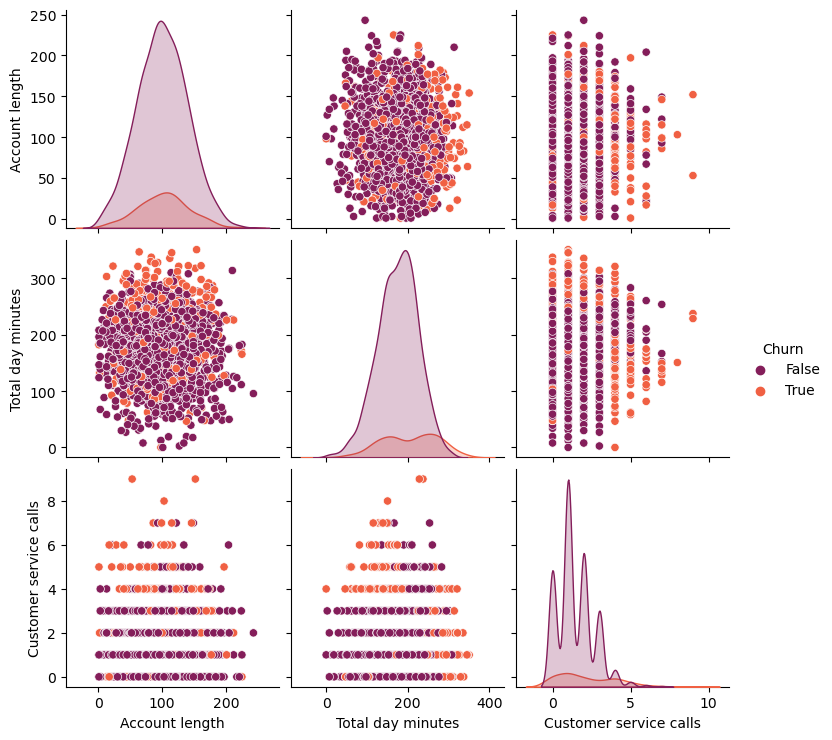

In [64]:
sns.pairplot(train, palette='rocket',hue='Churn', vars=['Account length', 'Total day minutes', 'Customer service calls'])
plt.show()

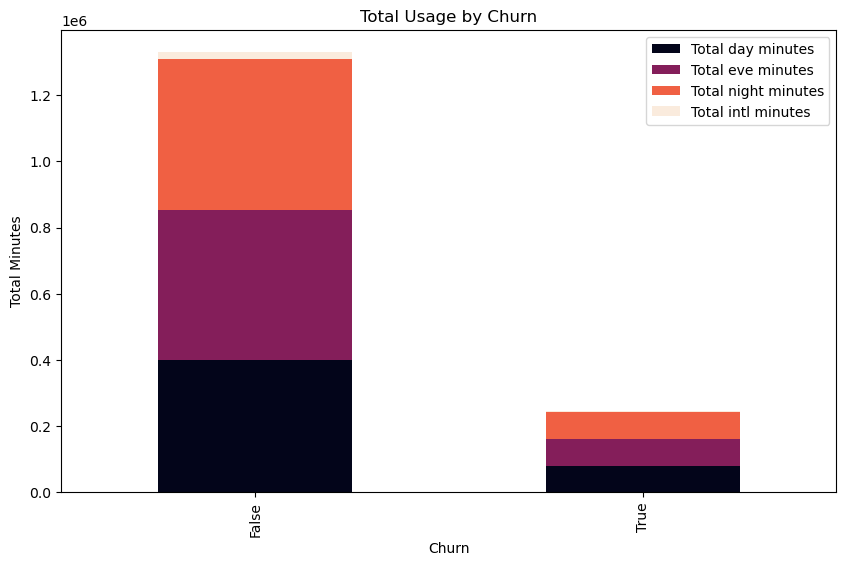

In [65]:
total_usage = train[['Churn', 'Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']]
total_usage = total_usage.groupby('Churn').sum()
total_usage.plot(kind='bar',cmap='rocket', stacked=True, figsize=(10, 6))
plt.title('Total Usage by Churn')
plt.ylabel('Total Minutes')
plt.show()

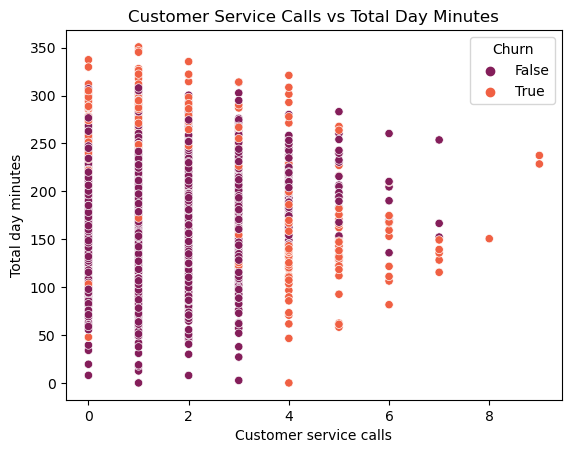

In [66]:
sns.scatterplot(x='Customer service calls', y='Total day minutes', hue='Churn',palette='rocket', data=train)
plt.title('Customer Service Calls vs Total Day Minutes')
plt.show()

●This could indicate whether customers who contact customer service more frequently are more likely to churn, possibly due to dissatisfaction or issues with the service.

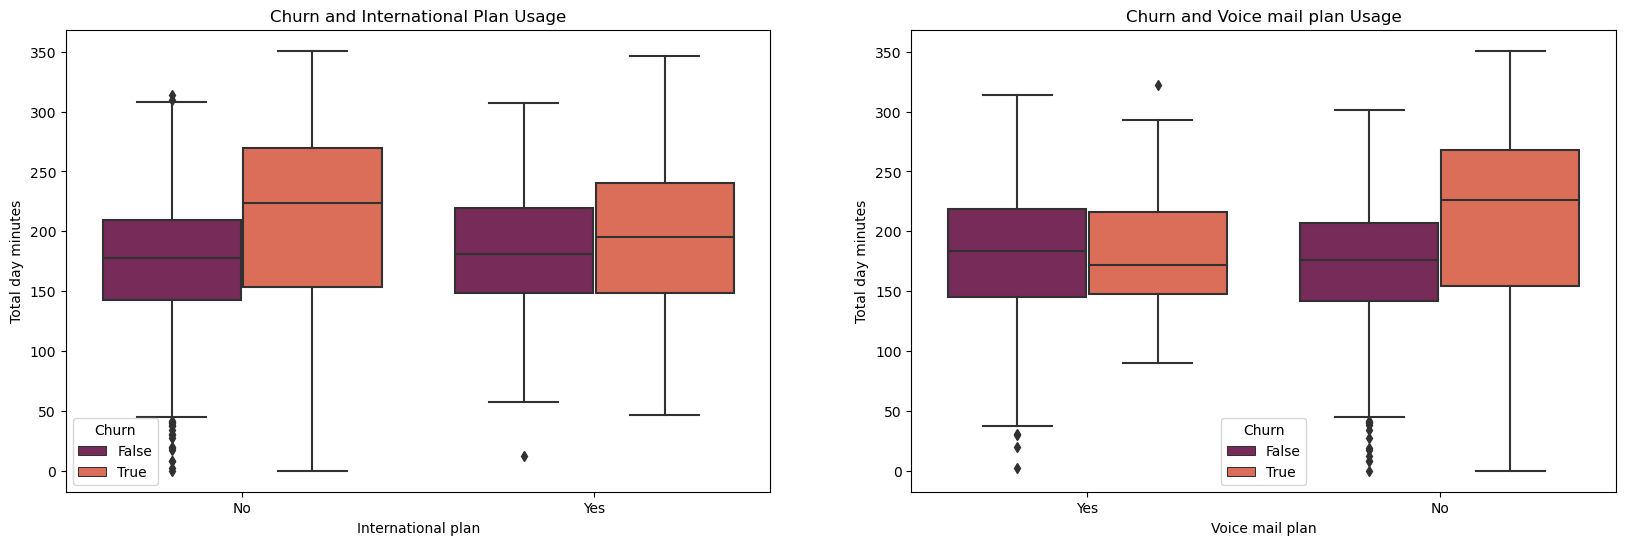

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

sns.boxplot(x='International plan', y='Total day minutes', hue='Churn',palette='rocket', data=train, ax=axs[0])
axs[0].set_title('Churn and International Plan Usage')
                 
# Plot for the rest of the states'
sns.boxplot(x='Voice mail plan', y='Total day minutes', hue='Churn',palette='rocket', data=train, ax=axs[1])
axs[1].set_title('Churn and Voice mail plan Usage')

plt.show()


●Customers without an international plan exhibit a significantly higher median churn rate, indicating that the presence 
or absence of an international plan is an important feature in predicting churn. This suggests that 
customers who do not subscribe to an international plan are more likely to leave the service. 
if the plot reveals a higher churn rate among customers with an international plan, 
it may point to potential dissatisfaction or cost-related issues associated with international services.
These insights highlight the critical role of the international plan in customer retention strategies.


●the plot comparing 'Churn' with the 'Voice Mail Plan' can reveal . A lower churn rate among voice mail users might 
suggest that this service adds value for customers, encouraging them to stay

# Futeare Engineering

## Features Importaance

In [68]:
train_copy['Churn'] = train_copy['Churn'].replace({'Yes': 1, 'No': 0})
train_copy['International plan'] = train_copy['International plan'].replace({'Yes': 1, 'No': 0})
train_copy['Voice mail plan'] = train_copy['Voice mail plan'].replace({'Yes': 1, 'No': 0})

label_encoder = LabelEncoder()
train_copy['State'] = label_encoder.fit_transform(train_copy['State'])



# Calculate mutual information between features and target
mi = mutual_info_classif(train_copy.drop('Churn', axis=1), train_copy['Churn'])

# Display importance
importance_df = pd.DataFrame({
    'Feature': train_copy.drop('Churn', axis=1).columns,
    'Importance': mi
})
print(importance_df.sort_values(by='Importance', ascending=False))


                   Feature  Importance
6        Total day minutes    0.045649
8         Total day charge    0.042864
19     total_minutes_check    0.035833
3       International plan    0.032791
18  Customer service calls    0.028333
17       Total intl charge    0.014070
15      Total intl minutes    0.012995
0                    State    0.011132
7          Total day calls    0.008566
4          Voice mail plan    0.005994
5    Number vmail messages    0.002424
9        Total eve minutes    0.000000
1           Account length    0.000000
11        Total eve charge    0.000000
12     Total night minutes    0.000000
13       Total night calls    0.000000
14      Total night charge    0.000000
16        Total intl calls    0.000000
2                Area code    0.000000
10         Total eve calls    0.000000


In [69]:
test_copy=test.copy()
test_copy['Churn'] = test_copy['Churn'].replace({'Yes': 1, 'No': 0})
test_copy['International plan'] = test_copy['International plan'].replace({'Yes': 1, 'No': 0})
test_copy['Voice mail plan'] = test_copy['Voice mail plan'].replace({'Yes': 1, 'No': 0})

label_encoder = LabelEncoder()
test_copy['State'] = label_encoder.fit_transform(test_copy['State'])



# Calculate mutual information between features and target
mi = mutual_info_classif(test_copy.drop('Churn', axis=1), test_copy['Churn'])

# Display importance
importance_df = pd.DataFrame({
    'Feature': test_copy.drop('Churn', axis=1).columns,
    'Importance': mi
})
print(importance_df.sort_values(by='Importance', ascending=False))

                   Feature  Importance
8         Total day charge    0.071447
6        Total day minutes    0.071235
10         Total eve calls    0.032301
17       Total intl charge    0.021604
15      Total intl minutes    0.018650
11        Total eve charge    0.016748
9        Total eve minutes    0.016533
18  Customer service calls    0.011353
16        Total intl calls    0.004582
3       International plan    0.001604
13       Total night calls    0.000771
0                    State    0.000640
2                Area code    0.000444
7          Total day calls    0.000000
1           Account length    0.000000
5    Number vmail messages    0.000000
4          Voice mail plan    0.000000
12     Total night minutes    0.000000
14      Total night charge    0.000000


## Create Features

In [70]:
train_copy['Day Charge per Minute'] = train_copy['Total day charge'] / train_copy['Total day minutes']
train_copy['Eve Charge per Minute'] = train_copy['Total eve charge'] / train_copy['Total eve minutes']
train_copy['Intl Charge per Minute'] = train_copy['Total intl charge'] / train_copy['Total intl minutes']
train_copy['Total Calls'] = train_copy['Total day calls'] + train_copy['Total eve calls'] + train_copy['Total night calls']
train_copy['Total Minutes'] = train_copy['Total day minutes'] + train_copy['Total eve minutes'] + train_copy['Total night minutes'] + train_copy['Total intl minutes']
median_account_length = train_copy['Account length'].median()
train_copy['Long-term Customer'] = (train_copy['Account length'] > median_account_length).astype(int)


In [71]:
train_copy.fillna(0, inplace=True)

In [72]:
mi = mutual_info_classif(train_copy.drop('Churn', axis=1), train_copy['Churn'])

# Display importance
importance_df = pd.DataFrame({
    'Feature': train_copy.drop('Churn', axis=1).columns,
    'Importance': mi
})
print(importance_df.sort_values(by='Importance', ascending=False))


                   Feature  Importance
8         Total day charge    0.047510
18  Customer service calls    0.043668
6        Total day minutes    0.042700
24           Total Minutes    0.038741
19     total_minutes_check    0.037826
3       International plan    0.034573
22  Intl Charge per Minute    0.016191
17       Total intl charge    0.015816
20   Day Charge per Minute    0.010982
4          Voice mail plan    0.010319
21   Eve Charge per Minute    0.009054
5    Number vmail messages    0.006672
15      Total intl minutes    0.006472
1           Account length    0.004450
0                    State    0.003958
14      Total night charge    0.003124
16        Total intl calls    0.002796
25      Long-term Customer    0.001375
7          Total day calls    0.000808
12     Total night minutes    0.000000
11        Total eve charge    0.000000
10         Total eve calls    0.000000
9        Total eve minutes    0.000000
23             Total Calls    0.000000
2                Area cod

In [73]:
train['Day Charge per Minute'] = train['Total day charge'] / train['Total day minutes']
train['Eve Charge per Minute'] = train['Total eve charge'] / train['Total eve minutes']
train['Intl Charge per Minute'] = train['Total intl charge'] / train['Total intl minutes']
train['Total Calls'] = train['Total day calls'] + train['Total eve calls'] + train['Total night calls']
train['Total Minutes'] = train['Total day minutes'] + train['Total eve minutes'] + train['Total night minutes'] + train['Total intl minutes']

In [74]:
test['Day Charge per Minute'] = test['Total day charge'] / test['Total day minutes']
test['Eve Charge per Minute'] = test['Total eve charge'] / test['Total eve minutes']
test['Intl Charge per Minute'] = test['Total intl charge'] / test['Total intl minutes']
test['Total Calls'] = test['Total day calls'] + test['Total eve calls'] + test['Total night calls']
test['Total Minutes'] = test['Total day minutes'] + test['Total eve minutes'] + test['Total night minutes'] + test['Total intl minutes']

In [75]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

## Remove Columns

In [76]:
train = train.drop(columns= [ 'Total eve charge', 'Total night calls','Total night charge','Total night minutes','Total eve minutes',
                           'Account length', 'Area code','Total eve calls'])
test = test.drop(columns= [ 'Total eve charge', 'Total night calls','Total night charge','Total night minutes','Total eve minutes',
                           'Account length', 'Area code','Total eve calls'])
train

,State,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Day Charge per Minute,Eve Charge per Minute,Intl Charge per Minute,Total Calls,Total Minutes
0,KS,No,Yes,25,265.1,110,45.07,10.0,3,2.70,1,False,0.170011,0.085005,0.270000,300,717.2
1,OH,No,Yes,26,161.6,123,27.47,13.7,3,3.70,1,False,0.169988,0.085013,0.270073,329,625.2
2,NJ,No,No,0,243.4,114,41.38,12.2,5,3.29,0,False,0.170008,0.084983,0.269672,328,539.4
3,OH,Yes,No,0,299.4,71,50.90,6.6,7,1.78,2,False,0.170007,0.084976,0.269697,248,564.8
4,OK,Yes,No,0,166.7,113,28.34,10.1,3,2.73,3,False,0.170006,0.085030,0.270297,356,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,No,No,0,134.7,98,22.90,11.8,5,3.19,2,False,0.170007,0.084976,0.270339,294,557.6
2662,AZ,No,Yes,36,156.2,77,26.55,9.9,6,2.67,2,False,0.169974,0.085012,0.269697,286,660.7
2663,WV,No,No,0,231.1,57,39.29,9.6,4,2.59,3,False,0.170013,0.085007,0.269792,235,585.4
2664,RI,No,No,0,180.8,109,30.74,14.1,6,3.81,2,False,0.170022,0.085007,0.270213,258,675.6


# Split Data

In [77]:
X_train= train.drop(columns=['Churn'])  # Features
y_train = train['Churn']  # Target variable

X_test = test.drop(columns=['Churn'])
y_test = test['Churn']

# Piplines

In [78]:
X_train.skew()

Number vmail messages      1.271774
Total day minutes         -0.053106
Total day calls           -0.128267
Total day charge          -0.053087
Total intl minutes        -0.224434
Total intl calls           1.358769
Total intl charge         -0.224569
Customer service calls     1.095176
Day Charge per Minute    -36.487548
Eve Charge per Minute    -51.625656
Intl Charge per Minute   -13.220951
Total Calls               -0.015713
Total Minutes             -0.076416
dtype: float64

In [79]:
categorical_columns = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

right_skew = ['Total intl calls', 'Number vmail messages','Customer service calls']
left_skew = ['Intl Charge per Minute', 'Eve Charge per Minute','Day Charge per Minute']

remaining_numerical_columns = [col for col in numerical_columns if col not in right_skew and col not in left_skew]
# Pipeline for right-skewed columns
right_skew_pipeline = Pipeline(steps=[
    ('minmax_scaler', MinMaxScaler()),  # Scale using MinMaxScaler
    ('log_transform', FunctionTransformer(np.log1p, validate=False))  # Log transformation
])

# Pipeline for left-skewed columns
left_skew_pipeline = Pipeline(steps=[
    ('minmax_scaler', MinMaxScaler()),  # Scale using MinMaxScaler
    ('reciprocal_transform', FunctionTransformer(lambda x: np.log1p(1/x), validate=False))  # Reciprocal log transformation
])

remaining_numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize the columns
])

# Pipeline for categorical columns
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))  # OneHotEncoding
])


# Create a ColumnTransformer to apply different pipelines to numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('right_skew', right_skew_pipeline, right_skew),
        ('left_skew', left_skew_pipeline, left_skew),
        ('remaining_num', remaining_numerical_pipeline, remaining_numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)


In [80]:
# Apply the transformations on X and y for both train and test sets
X_train_transformed1 = preprocessor.fit_transform(X_train)  # Fit and transform on training data
X_test_transformed1 = preprocessor.transform(X_test)  # Transform on test data


In [81]:
X_train_transformed1[np.isinf(X_train_transformed1)] = 0

In [82]:
X_test_transformed1[np.isinf(X_test_transformed1)] = 0

# Modeling

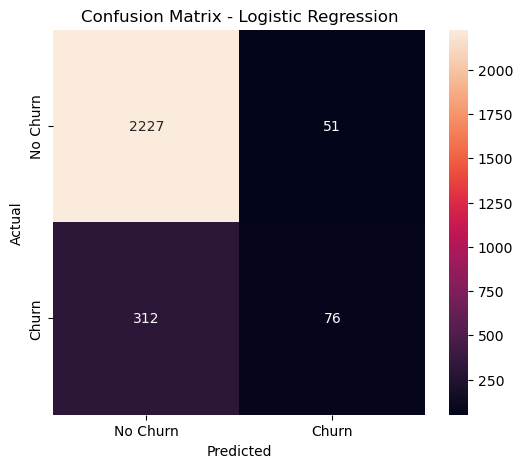

Metrics for Logistic Regression:


,Logistic Regression
Accuracy,0.863841
Precision,0.598425
Recall,0.195876
F1-Score,0.295146


In [83]:
# Logistic Regression model
LR = LogisticRegression()

# Perform cross-validation predictions
y_train_pred_lr = cross_val_predict(LR, X_train_transformed1, y_train, cv=5)

# Generate confusion matrix
cm_lr = confusion_matrix(y_train, y_train_pred_lr)

# Calculate metrics
accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
precision_lr = precision_score(y_train, y_train_pred_lr)
recall_lr = recall_score(y_train, y_train_pred_lr)
f1_lr = f1_score(y_train, y_train_pred_lr)

# Create a DataFrame for metrics
metrics_lr = pd.DataFrame({
    'Logistic Regression': [accuracy_lr, precision_lr, recall_lr, f1_lr]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Plotting the confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='rocket', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display the metrics DataFrame
print("Metrics for Logistic Regression:")
metrics_lr

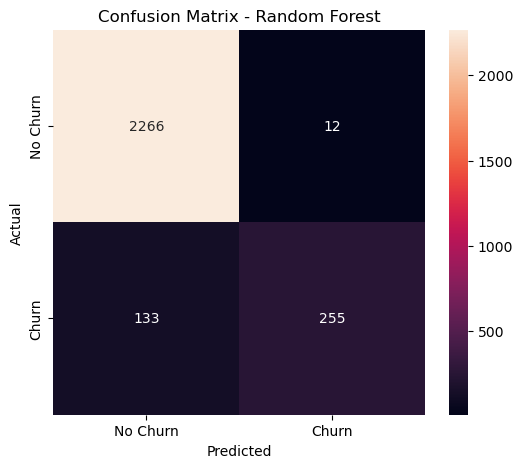

Metrics for Random Forest:


,Random Forest
Accuracy,0.945611
Precision,0.955056
Recall,0.657216
F1-Score,0.778626


In [84]:
# Random Forest model
RF = RandomForestClassifier()

# Perform cross-validation predictions
y_train_pred_rf = cross_val_predict(RF, X_train_transformed1, y_train, cv=5)

# Generate confusion matrix
cm_rf = confusion_matrix(y_train, y_train_pred_rf)

# Calculate metrics
accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
precision_rf = precision_score(y_train, y_train_pred_rf)
recall_rf = recall_score(y_train, y_train_pred_rf)
f1_rf = f1_score(y_train, y_train_pred_rf)

# Create a DataFrame for metrics
metrics_rf = pd.DataFrame({
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Plotting the confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='rocket', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display the metrics DataFrame
print("Metrics for Random Forest:")
metrics_rf

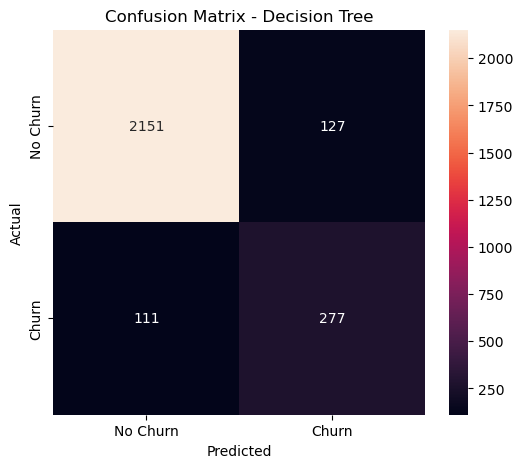

Metrics for Decision Tree:


,Decision Tree
Accuracy,0.910728
Precision,0.685644
Recall,0.713918
F1-Score,0.699495


In [85]:
# Decision Tree model
DT = DecisionTreeClassifier()

# Perform cross-validation predictions
y_train_pred_dt = cross_val_predict(DT, X_train_transformed1, y_train, cv=5)

# Generate confusion matrix
cm_dt = confusion_matrix(y_train, y_train_pred_dt)

# Calculate metrics
accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
precision_dt = precision_score(y_train, y_train_pred_dt)
recall_dt = recall_score(y_train, y_train_pred_dt)
f1_dt = f1_score(y_train, y_train_pred_dt)

# Create a DataFrame for metrics
metrics_dt = pd.DataFrame({
    'Decision Tree': [accuracy_dt, precision_dt, recall_dt, f1_dt]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Plotting the confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='rocket', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display the metrics DataFrame
print("Metrics for Decision Tree:")
metrics_dt

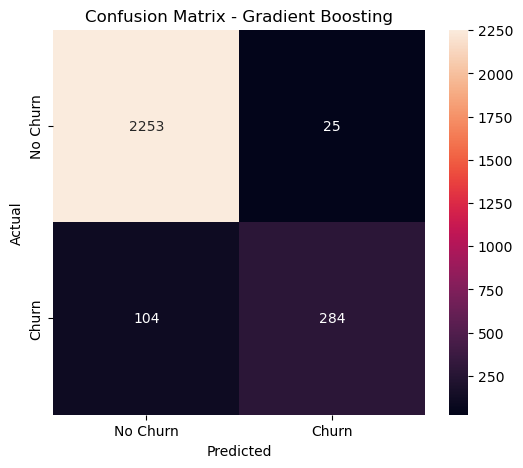

Metrics for Gradient Boosting:


,Gradient Boosting
Accuracy,0.951613
Precision,0.919094
Recall,0.731959
F1-Score,0.814921


In [86]:
# Gradient Boosting model
GB = GradientBoostingClassifier()

# Perform cross-validation predictions
y_train_pred_gb = cross_val_predict(GB, X_train_transformed1, y_train, cv=5)

# Generate confusion matrix
cm_gb = confusion_matrix(y_train, y_train_pred_gb)

# Calculate metrics
accuracy_gb = accuracy_score(y_train, y_train_pred_gb)
precision_gb = precision_score(y_train, y_train_pred_gb)
recall_gb = recall_score(y_train, y_train_pred_gb)
f1_gb = f1_score(y_train, y_train_pred_gb)

# Create a DataFrame for metrics
metrics_gb = pd.DataFrame({
    'Gradient Boosting': [accuracy_gb, precision_gb, recall_gb, f1_gb]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Plotting the confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_gb, annot=True, fmt='d',cmap='rocket', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display the metrics DataFrame
print("Metrics for Gradient Boosting:")
metrics_gb

●Precision is critical for this problem 

●best two are random forest and gradiant boosting

# Fine tunning 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


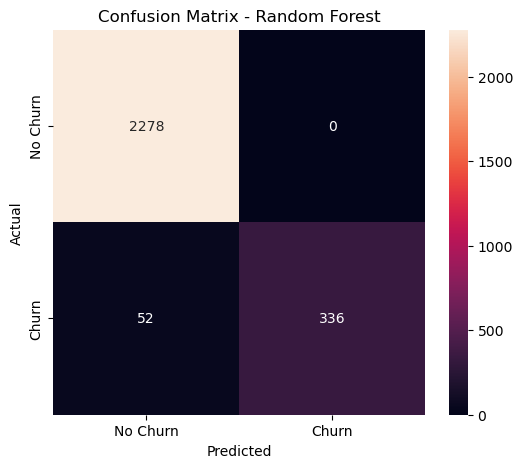

Metrics for Random Forest:


,Random Forest
Accuracy,0.980495
Precision,1.000000
Recall,0.865979
F1-Score,0.928177


In [94]:
rf = RandomForestClassifier()

# Define the parameter distribution for RandomizedSearchCV
param_dist_rf = {
    'n_estimators': [100,150,200,300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2,4, 6],
    'min_samples_leaf': [1,2,3,6],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform RandomizedSearchCV with cross-validation
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=100, cv=5,
                                      n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

# Fit the RandomizedSearchCV
random_search_rf.fit(X_train_transformed1, y_train)

# Get the best model
best_rf_model = random_search_rf.best_estimator_
print("Best Random Forest Parameters:", random_search_rf.best_params_)

# Predict using the best model
y_pred_rf = best_rf_model.predict(X_train_transformed1)

cm_rf = confusion_matrix(y_train, y_pred_rf)

accuracy_rf = accuracy_score(y_train, y_pred_rf)
precision_rf = precision_score(y_train, y_pred_rf)
recall_rf = recall_score(y_train, y_pred_rf)
f1_rf = f1_score(y_train, y_pred_rf)

metrics_rf = pd.DataFrame({
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='rocket', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print("Metrics for Random Forest:")
metrics_rf

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Gradient Boosting Parameters: {'subsample': 0.2, 'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 5, 'learning_rate': 0.05}


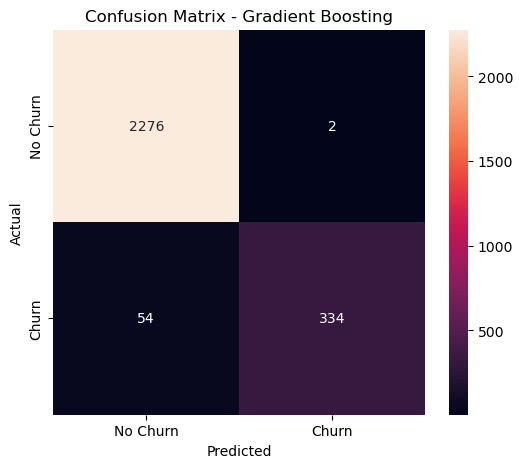

Metrics for Gradient Boosting:


,Gradient Boosting
Accuracy,0.978995
Precision,0.994048
Recall,0.860825
F1-Score,0.922652


In [98]:
# Gradient Boosting model
gb = GradientBoostingClassifier()

# Define the parameter distribution for RandomizedSearchCV
param_dist_gb = {
    'n_estimators': [50, 100, 150, 200],  # Lower number of estimators
    'max_depth': [3, 4, 5, 6],  # Shallow trees to reduce overfitting
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Lower learning rate
    'min_samples_split': [2, 5, 10],  # Higher values can help avoid overfitting
    'subsample': [.05,.1,.2,.3],  # Use a fraction of data to introduce randomness
}


# Perform RandomizedSearchCV with cross-validation
random_search_gb = RandomizedSearchCV(estimator=gb, param_distributions=param_dist_gb, n_iter=100, cv=5,
                                      n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

# Fit the RandomizedSearchCV
random_search_gb.fit(X_train_transformed1, y_train)

# Get the best model
best_gb_model = random_search_gb.best_estimator_
print("Best Gradient Boosting Parameters:", random_search_gb.best_params_)

# Predict using the best model
y_pred_gb = best_gb_model.predict(X_train_transformed1)

# Generate confusion matrix
cm_gb = confusion_matrix(y_train, y_pred_gb)

# Calculate metrics
accuracy_gb = accuracy_score(y_train, y_pred_gb)
precision_gb = precision_score(y_train, y_pred_gb)
recall_gb = recall_score(y_train, y_pred_gb)
f1_gb = f1_score(y_train, y_pred_gb)

# Create a DataFrame for metrics
metrics_gb = pd.DataFrame({
    'Gradient Boosting': [accuracy_gb, precision_gb, recall_gb, f1_gb]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Plot the confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='rocket', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display the metrics DataFrame
print("Metrics for Gradient Boosting:")
metrics_gb


# Testing

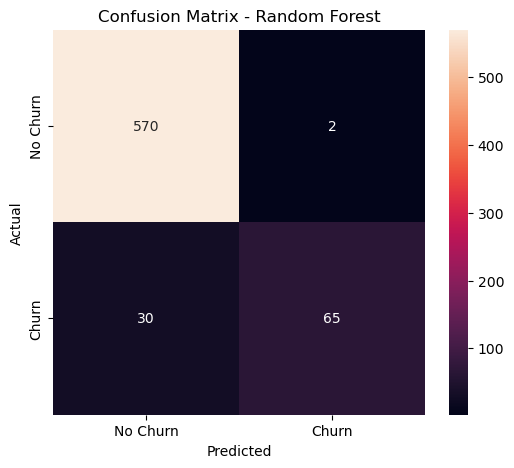

,Random Forest
Accuracy,0.952024
Precision,0.970149
Recall,0.684211
F1-Score,0.802469


In [99]:
y_pred_rf = best_rf_model.predict(X_test_transformed1)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='rocket', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display the metrics DataFrame for Random Forest
metrics_rf = pd.DataFrame({
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

metrics_rf

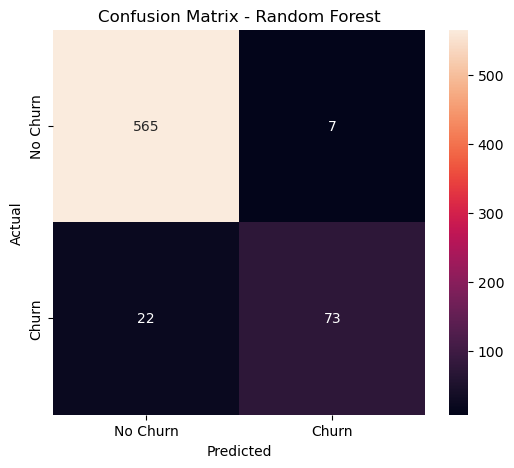

,Random Forest
Accuracy,0.956522
Precision,0.912500
Recall,0.768421
F1-Score,0.834286


In [100]:
y_pred_gb = best_gb_model.predict(X_test_transformed1)
accuracy_rf = accuracy_score(y_test, y_pred_gb)
precision_rf = precision_score(y_test, y_pred_gb)
recall_rf = recall_score(y_test, y_pred_gb)
f1_rf = f1_score(y_test, y_pred_gb)

cm_rf = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='rocket', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display the metrics DataFrame for Random Forest
metrics_rf = pd.DataFrame({
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

metrics_rf

●The Random Forest model shows signs of overfitting, as its performance on the training data is much better
than on the test data.

●Gradient Boosting, on the other hand, has more consistent performance between training and testing,
suggesting better generalization.